In this project we will be looking at the employee exit survey. The aim of the project is to find what kind of dissatisfaction do pople have when they leave the company

The data for TAFE employee exit survey is https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
The data for DETE is taken from https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey



In [1224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1225]:
#reading in non stated value as nan
tafe_survey = pd.read_csv('/Users/Suha/Projects/TestGitHub/EmployeeExitSurvey/TAFE.csv', encoding = 'latin1', na_values = 'NaN')
dete_survey = pd.read_csv('/Users/Suha/Projects/TestGitHub/EmployeeExitSurvey/DETE.csv', encoding = 'latin1', na_values = 'NaN')

DETE dataframe column description
ID: An id used to identify the participant of the survey
SeparationType: The reason why the person's employment ended
Cease Date: The year or month the person's employment ended
DETE Start Date: The year the person began employment with the DETE

TAFE dataframe columns description 
Record ID: An id used to identify the participant of the survey
Reason for ceasing employment: The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)



In [1226]:
tafe_survey.columns
# we do not need columns 17:66 so dropping them 
# We will keep the columns that indicate dissatisfaction for the employees
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
tafe_survey_updated.columns


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in ye

In [1227]:
# romving the columns that are not required for the analysis
# We will only keep the columns that indicate the dissatisfaction of the employees. 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [1228]:
#Let us clean the column names we need the python case
tafe_survey_updated.columns = tafe_survey_updated.columns.str.strip().str.replace('.','').str.replace('-','')
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('\s+', '_').str.lower().str.replace('/', '').str.replace('?', '').str.replace('(', '').str.replace(')','')
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternityfamily',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none',
       'gender_what_is_your_gender', 'currentage_current_age',
       'employment_type_employment_type', 'classification_classification',
       'lengthofserviceoverall_overall_length_of_service_at_institute_in_years',
       'lengthofservicecurrent_length_of_service_at_current_workplace_in_years'],
      dtype='object')

In [1229]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace('/', '').str.replace('\s+', '_').str.lower()

In [1230]:
#renaming the tafe columns to the dete column names

col_map = {'record_id':'id','cessation_year':'cease_date','reason_for_ceasing_employment': 'separationtype', 'gender_what_is_your_gender':'gender', 'currentage_current_age':'age','employment_type_employment_type':'employment_conditions','classification_classification':'position', 'lengthofserviceoverall_overall_length_of_service_at_institute_in_years':'institute_service'}
tafe_survey_updated.rename(columns = col_map, inplace = True)
tafe_survey_updated.columns

Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors_career_move_public_sector',
       'contributing_factors_career_move_private_sector',
       'contributing_factors_career_move_selfemployment',
       'contributing_factors_ill_health',
       'contributing_factors_maternityfamily',
       'contributing_factors_dissatisfaction',
       'contributing_factors_job_dissatisfaction',
       'contributing_factors_interpersonal_conflict',
       'contributing_factors_study', 'contributing_factors_travel',
       'contributing_factors_other', 'contributing_factors_none', 'gender',
       'age', 'employment_conditions', 'position', 'institute_service',
       'lengthofservicecurrent_length_of_service_at_current_workplace_in_years'],
      dtype='object')

Question - 
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

let us look at the columns that list the seperation type as the resignations

In [1231]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [1232]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']
tafe_resignations.shape

(340, 23)

In [1233]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [1234]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] =='Resignation-Other reasons' ) | (dete_survey_updated['separationtype'] =='Resignation-Other employer' )|(dete_survey_updated['separationtype'] =='Resignation-Move overseas/interstate' )]
dete_resignations.shape

(311, 35)

now the dete_resignations and tafe_resignations only contain the value that correspond to the resignation
        Let s look at the timings and yers in both to dtabases and check for anomalies

In [1235]:
tafe_survey_updated.columns
tafe_survey_updated[['cease_date','institute_service']]
tafe_survey_updated['cease_date'].value_counts(dropna = False)
# we will drop the 7 values where we do not see the cease date as they do not contribute much to the analysis
tafe_survey_updated = tafe_survey_updated.dropna(subset = ['cease_date'])
tafe_survey_updated.shape
# dropped 7 rows

tafe_survey_updated['cease_date'].value_counts(dropna = False)




2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: cease_date, dtype: int64

In [1236]:
dete_survey_updated['cease_date'].value_counts(ascending = True)
#dropping the rows where sease date = 'Not Stated'
dete_survey_updated = dete_survey_updated[dete_survey_updated['cease_date']!= 'Not Stated']
dete_survey_updated.shape



(788, 35)

In [1237]:
pattern = r"([A-Z][a-z]{2}[-])"
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.replace(pattern , '20').astype(float)
dete_survey_updated['cease_date'].value_counts()


2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

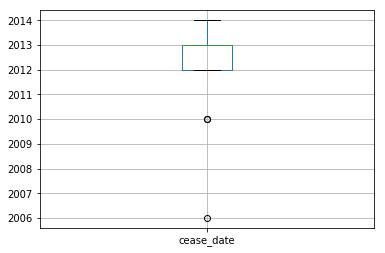

In [1238]:
#visualising the dates using the boxplot. The values look ok
dete_survey_updated.boxplot(column = 'cease_date')
plt.show()

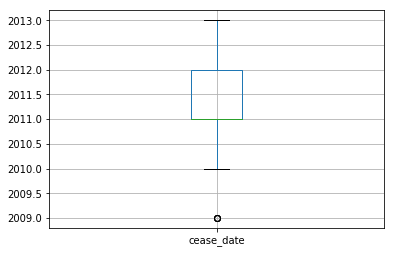

In [1239]:
tafe_survey_updated.boxplot(column = 'cease_date')
plt.show()

Most of the cease date in dete are around 2012 - 13 and range from 2006 - 2014
most of the cease date in the tafe are arounf 2011 -2012 and ranges from 2009-2013

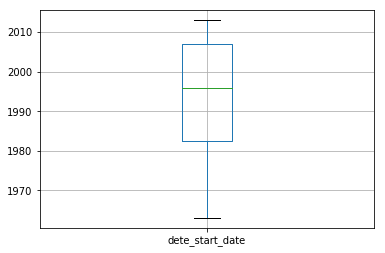

In [1240]:
# let us go ahead and look at the length of the service in both the data frame 
dete_survey_updated.head()
# look like dete_start_date - cease_date should give you service 
dete_survey_updated['dete_start_date'].value_counts(dropna = False)
# there are about 69 values that are not stated. we might drop these rows as no logical inference can be made about 
dete_survey_updated = dete_survey_updated[dete_survey_updated['dete_start_date']!= 'Not Stated']
dete_survey_updated['dete_start_date'] = dete_survey_updated['dete_start_date'].astype('float')
dete_survey_updated.boxplot(column = 'dete_start_date')
plt.show()


In [1241]:
#caluculaing length of service 
dete_resignations['institute_service'] =dete_survey_updated['cease_date'] -  dete_survey_updated['dete_start_date']
dete_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,May-12,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,May-12,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,Jul-12,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


We are trying to ascertain wether the resignation reson ties to length of the service. To do this in the dete data set, we inputed the service time from the startdate and the cease date variable.
Now we will go ahead and look at the dissatisfaction in the employees 

In tafe_survey_updated, the colums to look at are :
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

In dete_survey_updated the columns to look at are - 
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

We will create a new column called dissatisfied which is based on the following - 
 * Return True if any element in the selected columns above is True
 * Return False if none of the elements in the selected columns above is True
 * Return NaN if the value is NaN


In [1242]:
tafe_survey_updated.columns
# let us look at 'contributing_factors_dissatisfaction'
tafe_survey_updated['contributing_factors_dissatisfaction'] = tafe_survey_updated['contributing_factors_dissatisfaction'].str.strip()
col_map = {'Contributing Factors. Dissatisfaction': True , '-':False , 'NaN': np.nan}
tafe_survey_updated['contributing_factors_dissatisfaction'] = tafe_survey_updated['contributing_factors_dissatisfaction'].map(col_map)


In [1243]:
tafe_survey_updated['contributing_factors_dissatisfaction'].value_counts(dropna = False)

False    369
NaN      262
True      64
Name: contributing_factors_dissatisfaction, dtype: int64

In [1244]:
tafe_survey_updated.columns
# let us look at 'contributing_factors_job_dissatisfaction')
tafe_survey_updated['contributing_factors_job_dissatisfaction'] = tafe_survey_updated['contributing_factors_job_dissatisfaction'].str.strip()
tafe_survey_updated['contributing_factors_job_dissatisfaction'].value_counts()
col_map = {'Job Dissatisfaction':True, '-':False, 'NaN':np.nan}
tafe_survey_updated['contributing_factors_job_dissatisfaction'] = tafe_survey_updated['contributing_factors_job_dissatisfaction'].map(col_map)


In [1245]:
tafe_survey_updated['contributing_factors_job_dissatisfaction'].value_counts(dropna = False)

False    356
NaN      262
True      77
Name: contributing_factors_job_dissatisfaction, dtype: int64

We will create a new column called dissatisfied which is based on the following - 
 * Return True if any element in the selected columns above is True
 *  Return False if none of the elements in the selected columns above is True
 * Return NaN if the value is NaN

In [1246]:
combined = tafe_survey_updated[['contributing_factors_dissatisfaction','contributing_factors_job_dissatisfaction']]
tafe_resignations['dissatisfied'] = combined.any(axis = 1, skipna = False)
tafe_resignations['dissatisfied'].head()

3    False
4    False
5    False
6    False
7    False
Name: dissatisfied, dtype: object

dete dataframe analysis

In [1247]:
# let us look at these columns 
combined = dete_survey_updated[['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternityfamily', 'relocation', 'studytravel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',]]
dete_resignations['dissatisfied'] = combined.any(axis=1, skipna = False)

In [1248]:
dete_resignations['dissatisfied'].head()

3     False
5      True
8     False
9      True
11     True
Name: dissatisfied, dtype: object

Now we have a dissatisfied columns, the length of service in both tafe and dete dataframe
Let us add another column to dede and the tafe resignation dataframe to mark the source

In [1249]:
tafe_resignations['institute'] = 'TAFE'
dete_resignations['institute'] = 'DETE'

In [1250]:
tafe_resignations.columns
tafe_resignations_up = tafe_resignations[['id','institute', 'separationtype', 'gender', 'age','institute_service', 'dissatisfied']]

In [1251]:
dete_resignations.columns
dete_resignations_up = dete_resignations[['id','institute', 'separationtype', 'gender', 'age','institute_service', 'dissatisfied' ]]

Now both the datasets have the same columns which are needed for the analysis. Lets us go ahead and combine both the datasets datasets vertically that have the same columns

In [1252]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up])

In [1253]:
combined.head()

,id,institute,separationtype,gender,age,institute_service,dissatisfied
3,6.341400e+17,TAFE,Resignation,NaN,NaN,NaN,False
4,6.341470e+17,TAFE,Resignation,Male,41  45,4-Mar,False
5,6.341480e+17,TAFE,Resignation,Female,56 or older,10-Jul,False
6,6.341520e+17,TAFE,Resignation,Male,20 or younger,4-Mar,False
7,6.341540e+17,TAFE,Resignation,Male,46  50,4-Mar,False


In [1254]:
# let us look at each the columns and identify the nulls
combined['gender'].value_counts(dropna = False)
# close to 9 percent of the gender value is missing

Female    424
Male      168
NaN        59
Name: gender, dtype: int64

In [1255]:
combined['institute_service'].value_counts(dropna = False)


NaN                   88
Less than 1 year      73
2-Jan                 64
4-Mar                 63
6-May                 33
20-Nov                26
5.0                   23
1.0                   22
10-Jul                21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
36.0                   2
30.0                   2
25.0                   2


We will be converting these values into categories We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [1256]:
#let us convert the column into string type to extract the eyear
pattern1 = r"(\b[0-9]{2}\b\s)"
pattern2 = r"(\b[0-9]\b-[A-Z][a-z]{2})"
pattern3 = r"(\b[0-9]{2}\b-[A-Z][a-z]{2})"
pattern4 = r"([A-Z][a-z]+[\s][a-z]+[\s+])"
combined['ser_len'] = combined['institute_service'].astype('str').str.replace(pattern2 , '1').str.replace(pattern3 , '1').str.replace(pattern4, '')
combined['ser_len'] = combined['ser_len'].str.split(' ', expand = True)[0].astype('float')
combined['ser_len'] .head()


3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
Name: ser_len, dtype: float64

In [1257]:
def lengthofwork(element):
    if element < 3:
        return 'New'
    elif element >= 3 and element <6:
        return 'Experienced'
    elif element >= 6 and element <10:
        return 'Established'
    elif element >= 10:
        return 'Veteran'
    
combined['service_cat'] = combined['ser_len'].apply(lengthofwork)
combined['service_cat'].value_counts(dropna = False)

New            336
Veteran        116
NaN             88
Experienced     59
Established     52
Name: service_cat, dtype: int64

In [1258]:
#let us look at the dissatisfied columns
combined['dissatisfied'].value_counts(dropna = False)
# let us try to fill in the NAN values with 'True' as it is the most common value
combined['dissatisfied'] = combined['dissatisfied'].fillna(True)
combined['dissatisfied'].value_counts(dropna = False)

True     340
False    311
Name: dissatisfied, dtype: int64

In [1259]:
# Changing the nan values in service category to not available 
combined['service_cat'] = combined['service_cat'].fillna('Not Available')
combined['service_cat'].value_counts(dropna = False)

New              336
Veteran          116
Not Available     88
Experienced       59
Established       52
Name: service_cat, dtype: int64

In [1260]:
# let us explore how the dissatisfaction is spread across the sevice category
plot_values = combined.pivot_table(index = 'service_cat' , values = 'dissatisfied' , aggfunc = lambda x:(x.sum()*100/340))


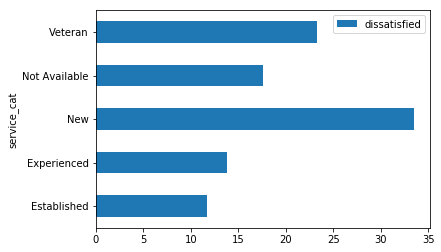

In [1261]:
%matplotlib inline
plot_values.plot(kind = 'barh' , ylim = (0,50), label = 'percentage')
plt.show()

This employees who have the lowest level of service are likely to be least happy with their jobs, followed by the veterans. The dissatisfactions seems to be the least amoungst the established employees. 

Now let us see how each of the age group is affected by the dissatisfaction

In [1262]:
combined['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45          45
46-50            42
36-40            41
46  50          39
26-30            35
21  25          33
26  30          32
31  35          32
36  40          32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [1263]:
# cleaning this column to get proper ages
combined[['age1', 'age2', 'age3']] = combined['age'].str.strip().str.replace(r"\s", '-').str.split('-',expand = True )
combined[['age1', 'age2', 'age3']]
combined['age4'] = combined['age3'].fillna(combined['age2'])
combined[['age1', 'age2', 'age3', 'age4']]
combined['new_age'] = combined['age1'] +'-'+ combined['age4'] 
combined.drop(['age1', 'age2', 'age3', 'age4'], axis = 1)
combined['new_age'].value_counts()

41-45         93
46-50         81
36-40         73
51-55         71
26-30         67
21-25         62
31-35         61
56-older      29
56-60         26
61-older      23
20-younger    10
Name: new_age, dtype: int64

In [1265]:
col_map = {'56-60' :'56-older ', '61-older':'56-older ' }
combined['new_age'] = combined['new_age'].replace(['56-60', '61-older'],'56-older')
combined['new_age'].value_counts(dropna = False)


41-45         93
46-50         81
56-older      78
36-40         73
51-55         71
26-30         67
21-25         62
31-35         61
NaN           55
20-younger    10
Name: new_age, dtype: int64

In [1268]:
#let is fill the NAN values with not available
combined['new_age'] = combined['new_age'].fillna('Not Available')
combined['new_age'].value_counts(dropna = False)

41-45            93
46-50            81
56-older         78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
Not Available    55
20-younger       10
Name: new_age, dtype: int64

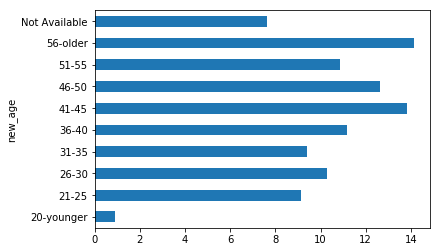

In [1276]:
# let us plot the dissatisfaction in amongst various age groups
%matplotlib inline
age_pivot = combined.pivot_table(index = 'new_age' , values = 'dissatisfied', aggfunc = lambda x:(x.sum()*100/340))
age_pivot.plot(kind = 'barh' , ylim = (0,70), legend = False)

Maximum dissatisfaction is observed in the age group of 56 & older, followedby 41-45. Generally people above 40 are more dissatisfied. 